# Directed graphs 

[Directed graphs](https://en.wikipedia.org/wiki/Directed_graph)


In [1]:
import networkx
from typing import Hashable

class DiGraph:
    """A directed graph with hashable node objects.

    Edges are between different nodes.
    There's at most one edge from one node to another.
    """

    def __init__(self):
        self.out = dict()   # a map of nodes to their out-neighbours

    def has_node(self, node: Hashable) -> bool:
        """Return True if and only if the graph has the node."""
        return node in self.out

    def has_edge(self, start: Hashable, end: Hashable) -> bool:
        """Return True if and only if edge start -> end exists.

        Preconditions: self.has_node(start) and self.has_node(end)
        """
        return end in self.out[start]

    def add_node(self, node: Hashable) -> None:
        """Add the node to the graph.

        Preconditions: not self.has_node(node)
        """
        self.out[node] = set()

    def add_edge(self, start: Hashable, end: Hashable) -> None:
        """Add edge start -> end to the graph.

        If the edge already exists, do nothing.

        Preconditions:
        self.has_node(start) and self.has_node(end) and start != end
        """
        self.out[start].add(end)

    def remove_node(self, node: Hashable) -> None:
        """Remove the node and all its attached edges.

        Preconditions: self.has_node(node)
        """
        self.out.pop(node)
        for start in self.out:
            self.remove_edge(start, node)

    def remove_edge(self, start: Hashable, end: Hashable) -> None:
        """Remove edge start -> end from the graph.

        If the edge doesn't exist, do nothing.

        Preconditions: self.has_node(start) and self.has_node(end)
        """
        self.out[start].discard(end)

    def nodes(self) -> set:
        """Return the graph's nodes."""
        all_nodes = set()
        for node in self.out:
            all_nodes.add(node)
        return all_nodes

    def edges(self) -> set:
        """Return the graph's edges as a set of pairs (start, end)."""
        all_edges = set()
        for start in self.out:
            for end in self.out[start]:
                all_edges.add( (start, end) )
        return all_edges

    def out_neighbours(self, node: Hashable) -> set:
        """Return the out-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        return set(self.out[node])  # return a copy

    def out_degree(self, node: Hashable) -> int:
        """Return the number of out-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        return len(self.out[node])

    def in_neighbours(self, node: Hashable) -> set:
        """Return the in-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        start_nodes = set()
        for start in self.out:
            if self.has_edge(start, node):
                start_nodes.add(start)
        return start_nodes

    def in_degree(self, node: Hashable) -> int:
        """Return the number of in-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        return len(self.in_neighbours(node))

    def neighbours(self, node: Hashable) -> set:
        """Return the in- and out-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        return self.out_neighbours(node).union(self.in_neighbours(node))

    def degree(self, node: Hashable) -> int:
        """Return the number of in- and out-going edges of the node.

        Preconditions: self.has_node(node)
        """
        return self.in_degree(node) + self.out_degree(node)

    def draw(self) -> None:
        """Draw the graph."""
        if type(self) == DiGraph:
            graph = networkx.DiGraph()
        else:
            graph = networkx.Graph()
        graph.add_nodes_from(self.nodes())
        graph.add_edges_from(self.edges())
        networkx.draw(graph, with_labels=True,
            node_size=1000, node_color='lightblue',
            font_size=12, font_weight='bold')

## Adding some nodes

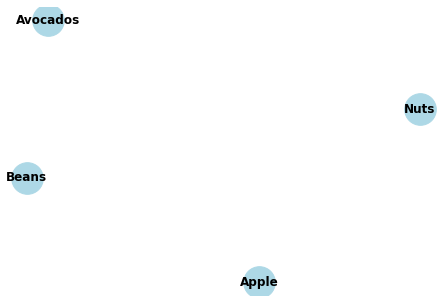

In [7]:
graph = DiGraph()
graph.add_node("Nuts")
graph.add_node("Avocados")
graph.add_node("Beans")
graph.add_node("Apple")

graph.draw()

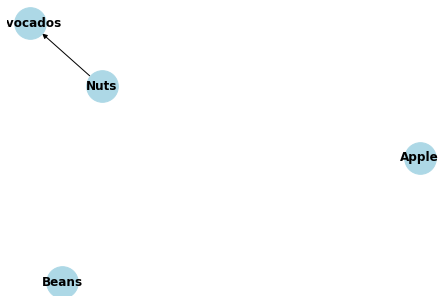

In [11]:
graph.add_edge("Nuts","Avocados")
graph.draw()

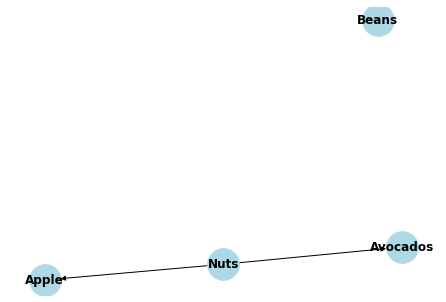

In [12]:
graph.add_edge("Nuts","Apple")
graph.draw()


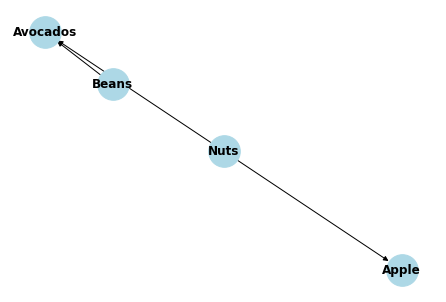

In [13]:
graph.add_edge("Beans","Avocados")
graph.draw()


In [15]:
graph.nodes()

{'Apple', 'Avocados', 'Beans', 'Nuts'}

In [16]:
graph.edges()

{('Beans', 'Avocados'), ('Nuts', 'Apple'), ('Nuts', 'Avocados')}

# Let's explore  preferred combination of food

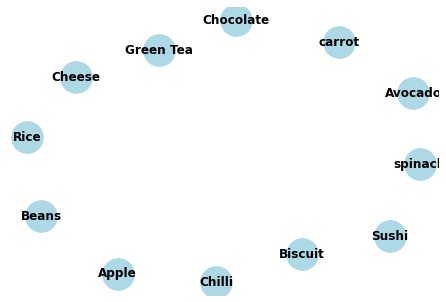

In [20]:
graph = DiGraph()
graph.add_node("Apple")
graph.add_node("Cheese")
graph.add_node("Biscuit")
graph.add_node("Avocado")
graph.add_node("Chilli"),
graph.add_node("Chocolate"),
graph.add_node("Green Tea")
graph.add_node("Sushi")
graph.add_node("Beans")
graph.add_node("Rice")
graph.add_node("carrot")
graph.add_node("spinach")
graph.draw()

Sushi: in  1  - out  0
Green Tea: in  0  - out  1


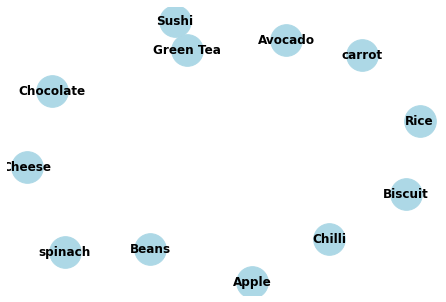

In [29]:
graph.add_edge("Green Tea","Sushi")
print("Sushi: in ", graph.in_degree("Sushi"), " - out ",
      graph.out_degree("Sushi"))
print("Green Tea: in ", graph.in_degree("Green Tea"), " - out ",
      graph.out_degree("Green Tea"))
graph.draw()

carrot : in  0  - out  0
Chocolate : in  1  - out  0
Apple : in  0  - out  0
Sushi : in  1  - out  0
Avocado : in  1  - out  0
Cheese : in  0  - out  0
Beans : in  1  - out  2
Rice : in  0  - out  1
Green Tea : in  0  - out  1
Chilli : in  1  - out  1
spinach : in  0  - out  0
Biscuit : in  0  - out  0


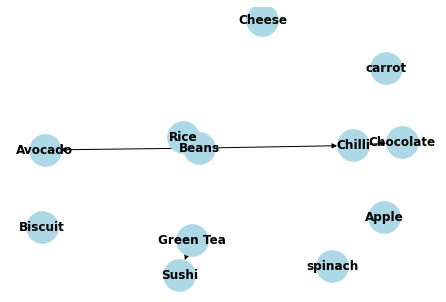

In [33]:
graph.add_edge("Rice","Beans")
graph.add_edge("Beans","Avocado")
graph.add_edge("Beans","Chilli")
graph.add_edge("Chilli","Chocolate")

for node in graph.nodes(): 
    print(node, ": in ", graph.in_degree(node), " - out ",
      graph.out_degree(node))

graph.draw()

carrot : in  0  - out  1
Chocolate : in  1  - out  1
Apple : in  0  - out  1
Sushi : in  1  - out  0
Avocado : in  1  - out  0
Cheese : in  1  - out  1
Beans : in  1  - out  2
Rice : in  0  - out  3
Green Tea : in  0  - out  1
Chilli : in  1  - out  1
spinach : in  1  - out  0
Biscuit : in  2  - out  0


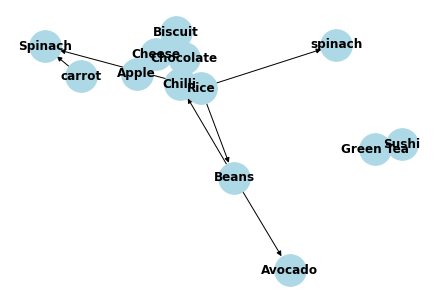

In [36]:
graph.add_edge("Cheese","Biscuit")
graph.add_edge("Apple","Cheese")
graph.add_edge("Chocolate","Biscuit")
graph.add_edge("carrot","Spinach")
graph.add_edge("Rice","spinach")


for node in graph.nodes(): 
    print(node, ": in ", graph.in_degree(node), " - out ",
      graph.out_degree(node))

graph.draw()

In [37]:
total_item = {}
for node in graph.nodes(): 
    total_item[node] = graph.in_degree(node) + graph.out_degree(node)

total_item

{'carrot': 1,
 'Chocolate': 2,
 'Apple': 1,
 'Sushi': 1,
 'Avocado': 1,
 'Cheese': 2,
 'Beans': 3,
 'Rice': 3,
 'Green Tea': 1,
 'Chilli': 2,
 'spinach': 1,
 'Biscuit': 2}

In [38]:
max_value = max(total_item.values())
max_value

3

In [39]:
keys  = []
items = total_item.items()
for key, value in items:
    if value == max_value:
        keys.append(key)
        
keys

['Beans', 'Rice']

In [41]:
print ("The food " , keys, " have the most combinations. The have all been paired ",
       max_value, " times.")

The food  ['Beans', 'Rice']  have the most combinations. The have all been paired  3  times.
